---
# Import libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---
# Load GPU

In [ ]:
!nvidia-smi

Sun May 15 08:49:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

---
# Test Convolutional layer and Max Pooling layer

In [ ]:
def convolution_layer_test(filters, kernel_size, s=1, p='valid', input_size=[1, 64, 64, 3]):
    inputs = tf.random.normal(input_size) # sampling from normal distribution
    print('input size: ', inputs.shape)
    conv = tf.keras.layers.Conv2D(filters, kernel_size, strides=s, padding=p)
    outputs = conv(inputs)
    print('output size: ', outputs.shape)

In [ ]:
def pooling_layer_test(pool_size, s=1, p='valid', input_size=[1, 64, 64, 3]):
    inputs = tf.random.normal(input_size) # sampling from normal distribution
    print('input size: ', inputs.shape)
    pool = tf.keras.layers.MaxPool2D(pool_size, strides=s, padding=p)
    outputs = pool(inputs)
    print('output size: ', outputs.shape)

In [ ]:
convolution_layer_test(10, 11, s=6, p='same', input_size=[1, 128, 128, 3])
# ceil(128/6) = 22가 되도록 zero padding

input size:  (1, 128, 128, 3)
output size:  (1, 22, 22, 10)


In [ ]:
convolution_layer_test(10, 3)
# (64 - 3)/1 + 1 = 62

input size:  (1, 64, 64, 3)
output size:  (1, 62, 62, 10)


In [ ]:
convolution_layer_test(100, 3)

input size:  (1, 64, 64, 3)
output size:  (1, 62, 62, 100)


In [ ]:
convolution_layer_test(100, 3, p='same')

input size:  (1, 64, 64, 3)
output size:  (1, 64, 64, 100)


In [ ]:
convolution_layer_test(100, 3, s=3, p='same')

input size:  (1, 64, 64, 3)
output size:  (1, 22, 22, 100)


In [ ]:
pooling_layer_test(2)
# (64 - 2) / 1 + 1

input size:  (1, 64, 64, 3)
output size:  (1, 63, 63, 3)


In [ ]:
pooling_layer_test(2, p='same')

input size:  (1, 64, 64, 3)
output size:  (1, 64, 64, 3)


---
# CNN for MNIST

In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(type(x_trainval), x_trainval.shape)
print(type(y_trainval), y_trainval.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size= 1/6, shuffle=True, stratify = y_trainval, random_state=34)
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (50000, 28, 28)
<class 'numpy.ndarray'> (50000,)


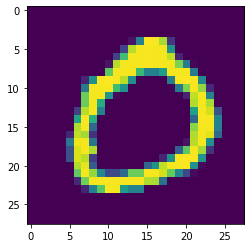

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Scale to [0, 1]
x_train, x_valid, x_test = x_train.astype('float32') / 255 , x_valid.astype('float32') / 255, x_test.astype('float32') / 255

# CNN need a dimension of channels
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(50000, 28, 28, 1) (10000, 28, 28, 1) (10000, 28, 28, 1)
(50000,) (10000,) (10000,)


## Use a Sequential class

In [ ]:
cnn = Sequential()

cnn.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics = ['accuracy'])

In [ ]:
result = cnn.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_valid, y_valid))

Epoch 1/5
391/391 [==============================] - 4s 6ms/step - loss: 0.3929 - accuracy: 0.8805 - val_loss: 0.1538 - val_accuracy: 0.9505
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0996 - accuracy: 0.9694 - val_loss: 0.0935 - val_accuracy: 0.9714
Epoch 3/5
391/391 [==============================] - 2s 6ms/step - loss: 0.0698 - accuracy: 0.9784 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.0647 - val_accuracy: 0.9799
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0518 - val_accuracy: 0.9848


In [ ]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0423 - accuracy: 0.9849
test loss:  0.04225722327828407
test acc:  0.9848999977111816


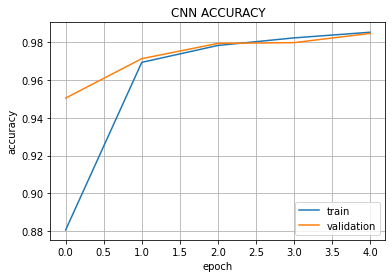

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

---
# A function for implementing training easily

In [ ]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

def train(model, x_train, y_train, x_valid, y_valid, x_test, y_test, epoch = 10, lr = 0.1):
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=lr), metrics = ['accuracy'])
    result = model.fit(x_train, y_train, epochs = epoch, batch_size = 128, validation_data = (x_valid, y_valid))
    test_result = cnn.evaluate(x_test, y_test)

    # show the learning curve
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('CNN ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

Epoch 1/3
391/391 [==============================] - 3s 6ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.0606 - val_accuracy: 0.9815
Epoch 2/3
391/391 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0483 - val_accuracy: 0.9858
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9864


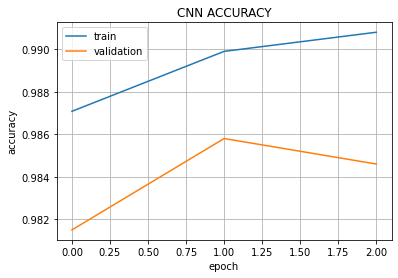

In [ ]:
train(cnn, *data, epoch=3)

## Use a Model class

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1))
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')


    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 0.4113 - accuracy: 0.8712 - val_loss: 0.1209 - val_accuracy: 0.9640
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0989 - accuracy: 0.9696 - val_loss: 0.1642 - val_accuracy: 0.9496
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.9778 - val_loss: 0.1352 - val_accuracy: 0.9571
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0678 - val_accuracy: 0.9785
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0588 - val_accuracy: 0.9833
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 

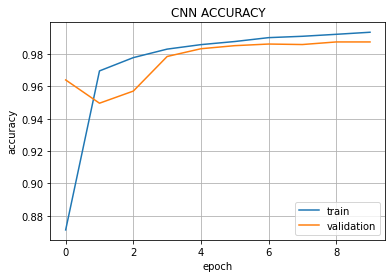

In [ ]:
cnn = CNN()
train(cnn, *data)

---
# CIFAR-10

In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print(type(x_trainval), x_trainval.shape)
print(type(y_trainval), y_trainval.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (50000, 1)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 1)


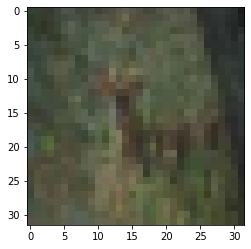

In [ ]:
plt.imshow(x_trainval[10])

In [ ]:
# Normalize to range 0 - 1
x_trainval = x_trainval.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Split train and validation dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size= 1/6, shuffle=True, stratify = y_trainval, random_state=34)

In [ ]:
print(type(x_train), x_trainval.shape)
print(type(y_train), y_train.shape)
print(type(x_valid), x_valid.shape)
print(type(y_valid), y_valid.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (41666, 1)
<class 'numpy.ndarray'> (8334, 32, 32, 3)
<class 'numpy.ndarray'> (8334, 1)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 1)


In [ ]:
#############
# Important #
#############

data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

---
# CNN

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3))
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')


    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/10
326/326 [==============================] - 3s 7ms/step - loss: 1.9640 - accuracy: 0.2970 - val_loss: 1.6618 - val_accuracy: 0.4056
Epoch 2/10
326/326 [==============================] - 2s 6ms/step - loss: 1.4956 - accuracy: 0.4696 - val_loss: 1.4253 - val_accuracy: 0.4772
Epoch 3/10
326/326 [==============================] - 2s 6ms/step - loss: 1.3012 - accuracy: 0.5384 - val_loss: 1.2367 - val_accuracy: 0.5512
Epoch 4/10
326/326 [==============================] - 2s 6ms/step - loss: 1.1607 - accuracy: 0.5914 - val_loss: 1.1336 - val_accuracy: 0.5991
Epoch 5/10
326/326 [==============================] - 2s 7ms/step - loss: 1.0524 - accuracy: 0.6294 - val_loss: 1.0923 - val_accuracy: 0.6126
Epoch 6/10
326/326 [==============================] - 2s 6ms/step - loss: 0.9651 - accuracy: 0.6604 - val_loss: 1.1327 - val_accuracy: 0.5966
Epoch 7/10
326/326 [==============================] - 3s 9ms/step - loss: 0.8750 - accuracy: 0.6929 - val_loss: 1.0775 - val_accuracy: 0.6192
Epoch 

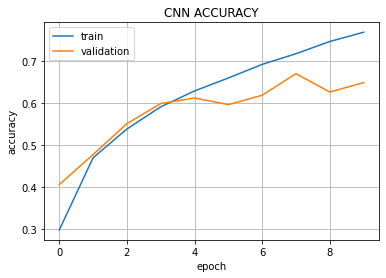

In [ ]:
cnn = CNN()
train(cnn, *data)

---
# Let's upgrade the network

## Use more layers

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(32,32,3))
        self.conv2 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu')
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv3 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.conv4 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')
        self.relu = layers.ReLU()


    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/10
326/326 [==============================] - 5s 12ms/step - loss: 2.0872 - accuracy: 0.2449 - val_loss: 1.7710 - val_accuracy: 0.3530
Epoch 2/10
326/326 [==============================] - 4s 11ms/step - loss: 1.5859 - accuracy: 0.4372 - val_loss: 1.3694 - val_accuracy: 0.5078
Epoch 3/10
326/326 [==============================] - 4s 11ms/step - loss: 1.3359 - accuracy: 0.5265 - val_loss: 1.3188 - val_accuracy: 0.5198
Epoch 4/10
326/326 [==============================] - 4s 11ms/step - loss: 1.1741 - accuracy: 0.5833 - val_loss: 1.1563 - val_accuracy: 0.5869
Epoch 5/10
326/326 [==============================] - 4s 11ms/step - loss: 1.0585 - accuracy: 0.6251 - val_loss: 1.0678 - val_accuracy: 0.6256
Epoch 6/10
326/326 [==============================] - 4s 11ms/step - loss: 0.9210 - accuracy: 0.6750 - val_loss: 1.0803 - val_accuracy: 0.6182
Epoch 7/10
326/326 [==============================] - 4s 11ms/step - loss: 0.8223 - accuracy: 0.7115 - val_loss: 1.0016 - val_accuracy: 0.6547

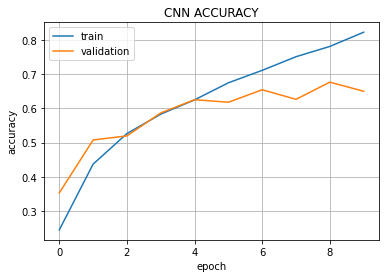

In [ ]:
cnn = CNN()
train(cnn, *data)

## Use batch normalization

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', input_shape=(32,32,3))
        self.bn1 = layers.BatchNormalization()
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same')
        self.bn2 = layers.BatchNormalization()
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')
        self.relu = layers.ReLU()


    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/10
326/326 [==============================] - 3s 8ms/step - loss: 1.8333 - accuracy: 0.3585 - val_loss: 2.5011 - val_accuracy: 0.2317
Epoch 2/10
326/326 [==============================] - 2s 7ms/step - loss: 1.3184 - accuracy: 0.5258 - val_loss: 1.4210 - val_accuracy: 0.5088
Epoch 3/10
326/326 [==============================] - 2s 7ms/step - loss: 1.1197 - accuracy: 0.6035 - val_loss: 1.4749 - val_accuracy: 0.5059
Epoch 4/10
326/326 [==============================] - 2s 7ms/step - loss: 0.9928 - accuracy: 0.6496 - val_loss: 1.2559 - val_accuracy: 0.5664
Epoch 5/10
326/326 [==============================] - 2s 7ms/step - loss: 0.9131 - accuracy: 0.6809 - val_loss: 1.1988 - val_accuracy: 0.5985
Epoch 6/10
326/326 [==============================] - 2s 7ms/step - loss: 0.8380 - accuracy: 0.7075 - val_loss: 1.8847 - val_accuracy: 0.4471
Epoch 7/10
326/326 [==============================] - 2s 7ms/step - loss: 0.7755 - accuracy: 0.7293 - val_loss: 1.3341 - val_accuracy: 0.5642
Epoch 

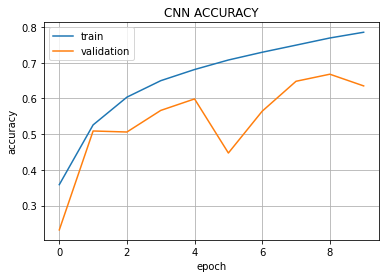

In [ ]:
cnn = CNN()
train(cnn, *data)

---
# Make Network more easily - use a function

In [ ]:
def make_conv_block(num_filters, filter_size, stride, padding='same', input_shape=None):
    conv_block = tf.keras.Sequential()
    if input_shape is not None:
        conv_block.add(layers.Conv2D(num_filters, filter_size, strides=stride, padding=padding, input_shape=input_shape))
    conv_block.add(layers.Conv2D(num_filters, filter_size, strides=stride, padding=padding))
    conv_block.add(layers.BatchNormalization())
    conv_block.add(layers.ReLU())
    return conv_block

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = make_conv_block(32, 3, 1, 'same', (32, 32, 3))
        self.conv2 = make_conv_block(32, 3, 1, 'same')
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')

        self.conv3 = make_conv_block(64, 3, 1, 'same')
        self.conv4 = make_conv_block(64, 3, 1, 'same')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')

        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')
        self.relu = layers.ReLU()


    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/10
326/326 [==============================] - 6s 18ms/step - loss: 1.8954 - accuracy: 0.3770 - val_loss: 1.8353 - val_accuracy: 0.3531
Epoch 2/10
326/326 [==============================] - 6s 17ms/step - loss: 1.3113 - accuracy: 0.5252 - val_loss: 1.2357 - val_accuracy: 0.5545
Epoch 3/10
326/326 [==============================] - 6s 17ms/step - loss: 1.0702 - accuracy: 0.6176 - val_loss: 1.0996 - val_accuracy: 0.6073
Epoch 4/10
326/326 [==============================] - 5s 17ms/step - loss: 0.8917 - accuracy: 0.6836 - val_loss: 1.1316 - val_accuracy: 0.6031
Epoch 5/10
326/326 [==============================] - 6s 17ms/step - loss: 0.7686 - accuracy: 0.7287 - val_loss: 0.8507 - val_accuracy: 0.6992
Epoch 6/10
326/326 [==============================] - 5s 16ms/step - loss: 0.6815 - accuracy: 0.7597 - val_loss: 1.1094 - val_accuracy: 0.6333
Epoch 7/10
326/326 [==============================] - 5s 16ms/step - loss: 0.6089 - accuracy: 0.7866 - val_loss: 1.0298 - val_accuracy: 0.6640

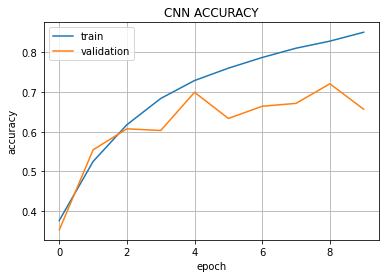

In [ ]:
cnn = CNN()
train(cnn, *data)

---
# Make Network more easily - use a custom layer

In [ ]:
class ConvBlock(layers.Layer):
    def __init__(self, num_filters, filter_size, stride, padding='same', input_shape=None):
        super(ConvBlock, self).__init__()
        if input_shape is not None:
            self.conv = layers.Conv2D(num_filters, filter_size, strides=stride, padding=padding, input_shape=input_shape)
        else:
            self.conv = layers.Conv2D(num_filters, filter_size, strides=stride, padding=padding)
        self.bn = layers.BatchNormalization()
        self.relu = layers.ReLU()

    def call(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)

        return x

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = ConvBlock(32, 3, 1, 'same', (32, 32, 3))
        self.conv2 = ConvBlock(32, 3, 1, 'same')
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')

        self.conv3 = ConvBlock(64, 3, 1, 'same')
        self.conv4 = ConvBlock(64, 3, 1, 'same')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')

        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')
        self.relu = layers.ReLU()


    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Epoch 1/10
326/326 [==============================] - 6s 15ms/step - loss: 1.9074 - accuracy: 0.3742 - val_loss: 2.6390 - val_accuracy: 0.1989
Epoch 2/10
326/326 [==============================] - 4s 13ms/step - loss: 1.2624 - accuracy: 0.5427 - val_loss: 1.5687 - val_accuracy: 0.4531
Epoch 3/10
326/326 [==============================] - 4s 13ms/step - loss: 1.0284 - accuracy: 0.6358 - val_loss: 1.3845 - val_accuracy: 0.5368
Epoch 4/10
326/326 [==============================] - 4s 13ms/step - loss: 0.8737 - accuracy: 0.6912 - val_loss: 1.0835 - val_accuracy: 0.6236
Epoch 5/10
326/326 [==============================] - 4s 13ms/step - loss: 0.7530 - accuracy: 0.7330 - val_loss: 0.9828 - val_accuracy: 0.6530
Epoch 6/10
326/326 [==============================] - 4s 13ms/step - loss: 0.6656 - accuracy: 0.7667 - val_loss: 0.8425 - val_accuracy: 0.7040
Epoch 7/10
326/326 [==============================] - 5s 14ms/step - loss: 0.5951 - accuracy: 0.7906 - val_loss: 0.8946 - val_accuracy: 0.6965

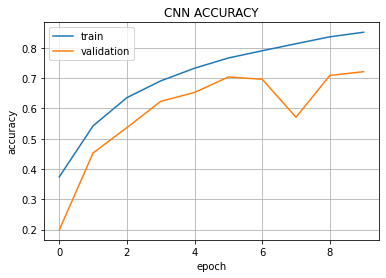

In [ ]:
cnn = CNN()
train(cnn, *data)